<a href="https://colab.research.google.com/github/marcelomj23/proprio/blob/main/Tech_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tech Challenge Fase 2 - Machine Learning**

In [80]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

## **Dados**

In [81]:
#Carregando os Dados e tratando as informações
path_ibovespa = '/content/dados_ibovespa.csv'
df_ibv = pd.read_csv(path_ibovespa,parse_dates=['Data'], dayfirst=True, thousands='.', decimal=',')
df_ibv.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,2022-12-29,109735,110237,111178,109560,"13,39M","-0,46%"
1,2022-12-28,110237,108578,110536,108578,"11,19M","1,53%"
2,2022-12-27,108578,108739,109353,107418,"11,16M","-0,15%"
3,2022-12-26,108738,109699,109755,108309,"5,22M","-0,87%"
4,2022-12-23,109698,107552,109994,107552,"12,85M","2,00%"


In [82]:
df_ibv.dtypes

Data        datetime64[ns]
Último               int64
Abertura             int64
Máxima               int64
Mínima               int64
Vol.                object
Var%                object
dtype: object

In [83]:
# Função para transformar a coluna `Vol.` de texto para números inteiros
def parse_vol(x):
  # Não faz nada caso não seja uma string
  if type(x) != str:
    return None

  # Multiplica por 1 milhão se possuí símbolo M ou por 1 mil se símbolo K
  multiplier = 1_000_000 if x.endswith('M') else 1_000

  # Remove o símbolo M ou K
  result = x[:-1]

  # Altera o separador para . ao invés de ,
  result = result.replace(',', '.')

  # Transforma a string em número
  result = float(result)

  # Multiplica o número pelo multiplicador e transforma em inteiro
  return int(result * multiplier)

In [84]:
# Função para transformar a coluna `Var%` de texto para número decimal
def parse_var(x):
  # Remove o símbolo de %
  result = x[:-1]

  # Altera o separador para . ao invés de ,
  result = result.replace(',', '.')

  # Transforma a string em número
  result = float(result)

  # Transforma em porcentagem
  return result / 100

In [85]:
# Cria um novo DataFrame
df_ibv2 = df_ibv.copy()
df_ibv2['Vol.'] = df_ibv2['Vol.'].apply(parse_vol)
df_ibv2['Var%'] = df_ibv2['Var%'].apply(parse_var)
df_ibv2 = df_ibv2.set_index('Data', drop=True)
df_ibv2.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200


In [86]:
df_ibv2.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [87]:
df_ibv2.loc[df_ibv2['Vol.'].isnull()]

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2016-02-10,40377,40592,40592,39960,NaN,-0.0053


In [88]:
df_ibv2 = df_ibv2.dropna()
df_ibv2.isnull().sum()

Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        0
Var%        0
dtype: int64

### **Gráficos - Análises**

In [89]:
df_ibv2.describe()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
count,2467.000000,2467.000000,2467.000000,2467.000000,2.467000e+03,2467.000000
mean,78603.554114,78585.035266,79353.935955,77824.330361,6.100759e+06,0.000364
std,25835.935986,25830.192885,26023.799429,25621.088247,3.765220e+06,0.015903
min,37497.000000,37501.000000,38031.000000,37046.000000,4.243200e+05,-0.147800
25%,53957.500000,53963.000000,54356.500000,53448.000000,3.450000e+06,-0.008200
50%,74657.000000,74656.000000,75470.000000,74145.000000,4.460000e+06,0.000500
75%,103387.000000,103316.000000,104284.000000,102342.500000,8.350000e+06,0.009100
max,130776.000000,130776.000000,131190.000000,129526.000000,2.603000e+07,0.139100


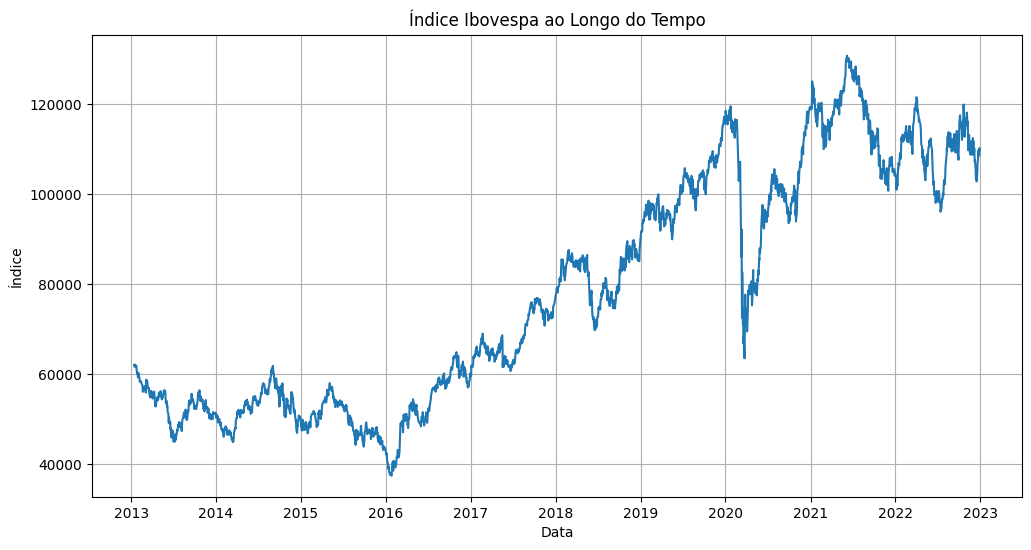

In [90]:
# Gráfico de linha para o Índice Ibovespa ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df_ibv['Data'], df_ibv['Último'])
plt.title('Índice Ibovespa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Índice')
plt.grid(True)
plt.show()


In [91]:
condicoes = [(df_ibv2['Var%'] < 0),
             (df_ibv2['Var%'] > 0)]
opcoes = ["0","1"]
df_ibv2['Classificação'] = np.select(condicoes, opcoes)
df_ibv2

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Classificação
Data,,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046,0
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153,1
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015,0
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087,0
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200,1
...,...,...,...,...,...,...,...
2013-01-18,61956,62197,62395,61822,3500000.0,-0.0038,0
2013-01-17,62194,61806,62309,61683,3380000.0,0.0066,1
2013-01-16,61787,61726,61787,61241,2790000.0,0.0010,1


In [92]:
condicoes = [(df_ibv2['Var%'] < 0),
             (df_ibv2['Var%'] == 0),
             (df_ibv2['Var%'] > 0)]
opcoes = ["Baixa","Nulo","Alta"]
df_ibv2['Alta_Baixa'] = np.select(condicoes, opcoes)
df_ibv2

,Último,Abertura,Máxima,Mínima,Vol.,Var%,Classificação,Alta_Baixa
Data,,,,,,,,
2022-12-29,109735,110237,111178,109560,13390000.0,-0.0046,0,Baixa
2022-12-28,110237,108578,110536,108578,11190000.0,0.0153,1,Alta
2022-12-27,108578,108739,109353,107418,11160000.0,-0.0015,0,Baixa
2022-12-26,108738,109699,109755,108309,5220000.0,-0.0087,0,Baixa
2022-12-23,109698,107552,109994,107552,12850000.0,0.0200,1,Alta
...,...,...,...,...,...,...,...,...
2013-01-18,61956,62197,62395,61822,3500000.0,-0.0038,0,Baixa
2013-01-17,62194,61806,62309,61683,3380000.0,0.0066,1,Alta
2013-01-16,61787,61726,61787,61241,2790000.0,0.0010,1,Alta


Text(0, 0.5, 'Fechamento')

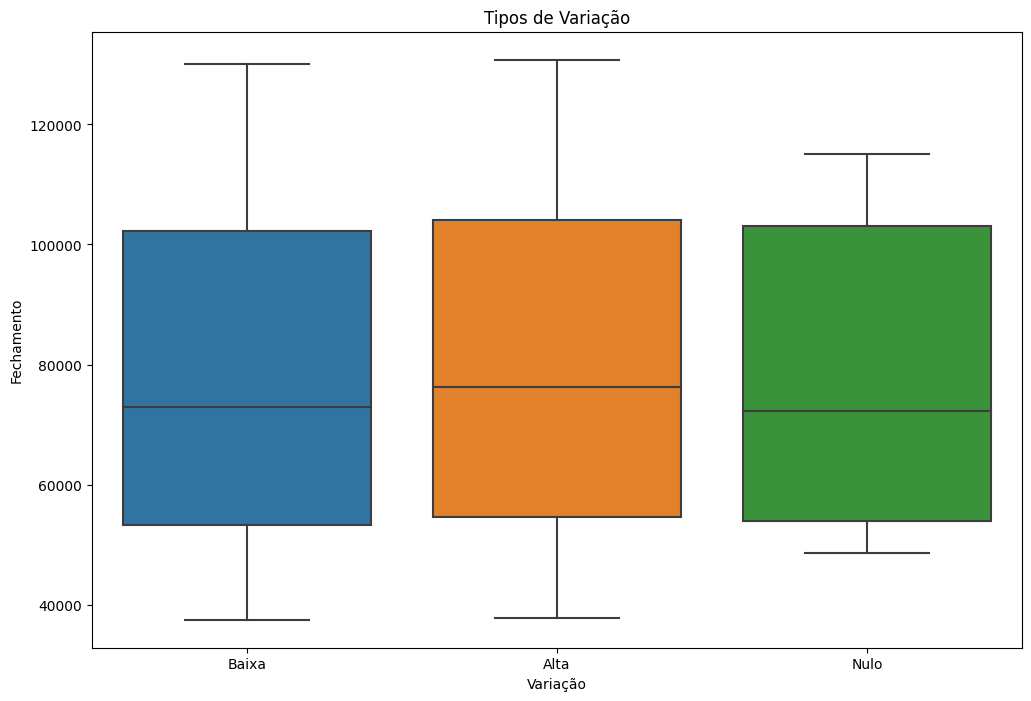

In [93]:
# Gráfico de Distribuição das Variações
fig, ax = plt.subplots(figsize = ( 12, 8 ))
plt.title("Tipos de Variação");
sns.boxplot(x = 'Alta_Baixa', y = 'Último', data = df_ibv2)
ax.set_xlabel( "Variação" , size = 10 )
ax.set_ylabel( "Fechamento" , size = 10 )



In [148]:
#  Criação de um  data frame padrão
df_prophet = df_ibv2.copy()
df_prophet= df_prophet.drop(columns=["Abertura","Máxima", "Vol.", "Var%", "Mínima","Classificação","Alta_Baixa"])
df_prophet.head()

,Último
dt2,
2022-12-29,109735
2022-12-28,110237
2022-12-27,108578
2022-12-26,108738
2022-12-23,109698


In [149]:
# renomeando as colunas
df_prophet.index.rename('ds', inplace=True)
df_prophet = df_prophet.rename(columns={'Último': 'y'})
df_prophet['ds'] = df_ibv2.index
df_prophet.head()

,y,ds
ds,,
2022-12-29,109735,2022-12-29
2022-12-28,110237,2022-12-28
2022-12-27,108578,2022-12-27
2022-12-26,108738,2022-12-26
2022-12-23,109698,2022-12-23


In [150]:
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2p23akz/82d_ee9q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2p23akz/l_8tabql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=42562', 'data', 'file=/tmp/tmpu2p23akz/82d_ee9q.json', 'init=/tmp/tmpu2p23akz/l_8tabql.json', 'output', 'file=/tmp/tmpu2p23akz/prophet_modelwlu54h0_/prophet_model-20230904234642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:46:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:46:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [151]:
# método auxiliar para previsão
future = m.make_future_dataframe(periods = 365)
# previsão do modelo
forecast = m.predict(future)

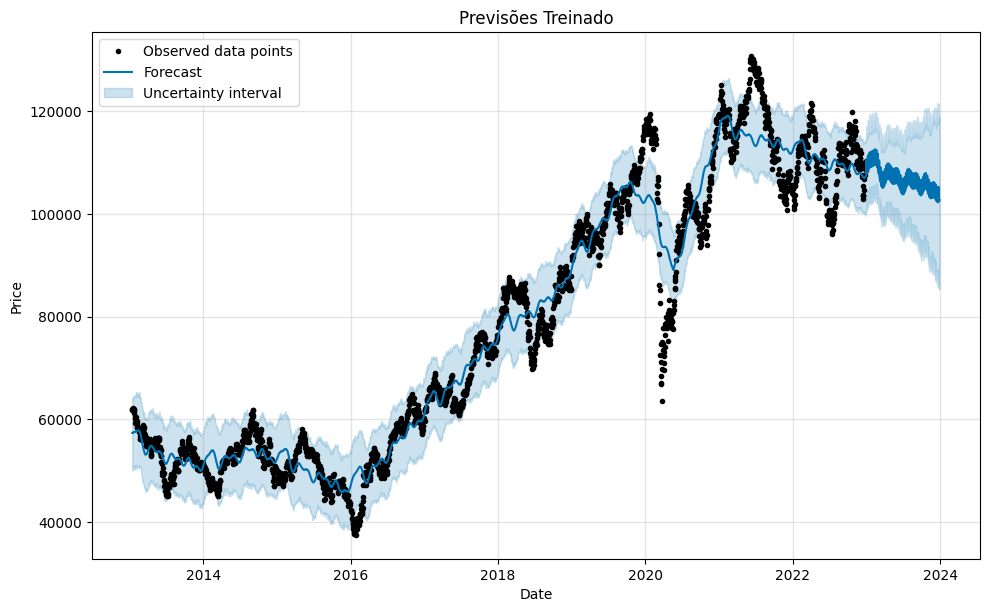

In [152]:
# previsões do modelo treinado
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price')
plt.title("Previsões Treinado")
plt.legend()

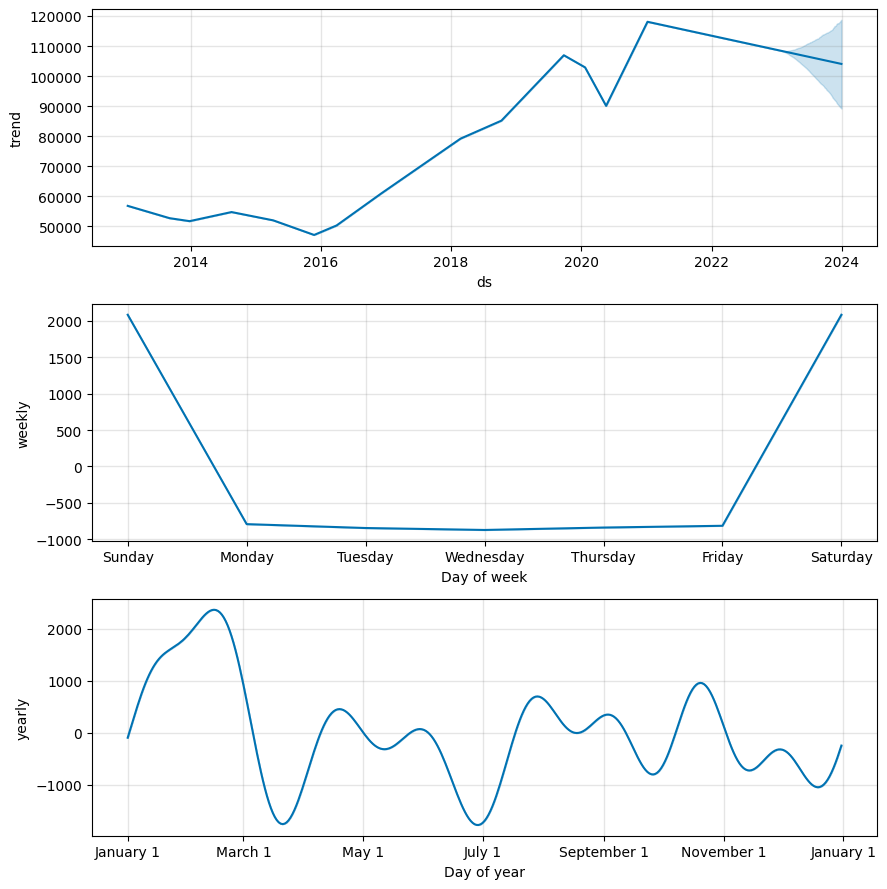

In [153]:
# verificando os componentes
figure2 = m.plot_components(forecast)

In [154]:
# definindo uma data
data_fim = '2022-01-01'
# definindo os dados de treino
train = df_prophet.loc[df_prophet['ds'] <= data_fim]
test = df_prophet.loc[df_prophet['ds'] > data_fim]

In [155]:
dias_a_prever = len(test.ds.unique())
dias_a_prever

250

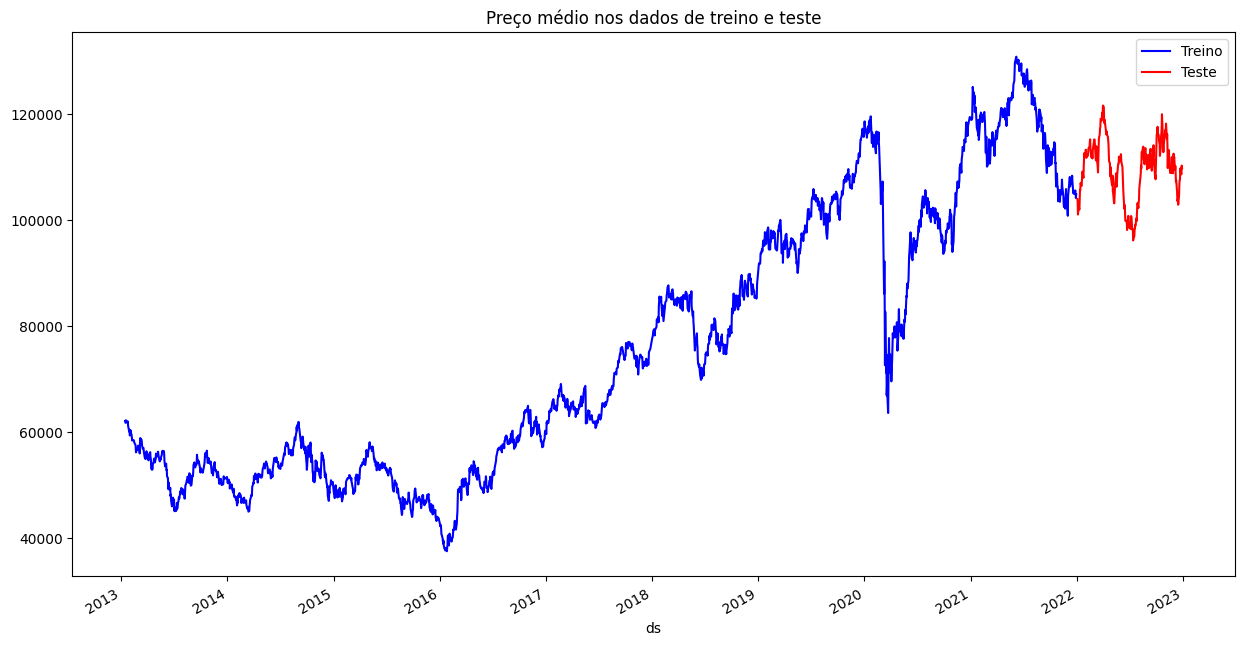

In [156]:

# definindo o tamanho do plot
f, ax = plt.subplots(figsize=(15,8))
train.plot(kind='line', x='ds', y='y', color='Blue', label='Treino', ax=ax)
test.plot(kind='line', x='ds', y='y', color='Red', label='Teste', ax=ax)
plt.title('Preço médio nos dados de treino e teste');

In [158]:
# instanciando o modelo
m = Prophet(yearly_seasonality=True)
m.fit(train)
# método auxiliar para previsão
future = m.make_future_dataframe(periods=dias_a_prever)
# previsão do modelo
forecast = m.predict(future)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2p23akz/tvuy56lj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpu2p23akz/j_9vwapz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88399', 'data', 'file=/tmp/tmpu2p23akz/tvuy56lj.json', 'init=/tmp/tmpu2p23akz/j_9vwapz.json', 'output', 'file=/tmp/tmpu2p23akz/prophet_modell7coqaqh/prophet_model-20230904234745.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
23:47:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
23:47:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


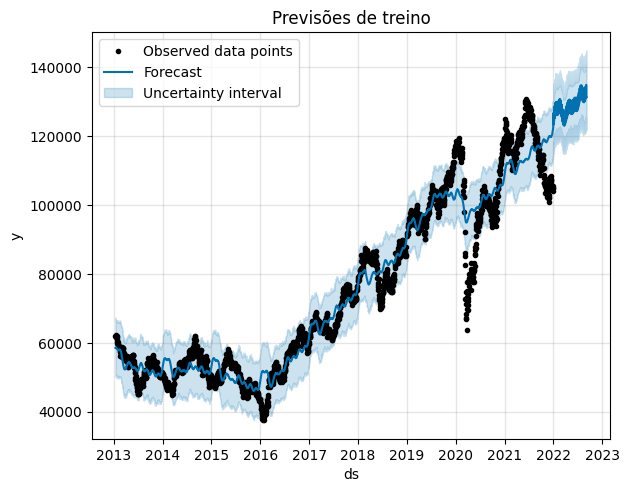

In [166]:
# configurando a área de plotagem
fig, ax = plt.subplots(1)
# plotando o gráfico
fig = m.plot(forecast, ax=ax)
# definindo o título
plt.title('Previsões de treino');
plt.legend()

In [162]:
# Previsões com os dados de teste
test_forecast = m.predict(test)
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
243,2022-12-21,134246.561640,123032.112325,145935.857591
244,2022-12-22,134334.928941,123464.625562,145066.539476
245,2022-12-23,134587.766898,123558.319091,146240.014175
246,2022-12-26,135212.056724,123941.077577,146341.445391
247,2022-12-27,135443.427224,123625.999359,147146.534798
248,2022-12-28,135608.663372,123542.217250,147447.992625
249,2022-12-29,135823.623823,123829.272662,147719.875043


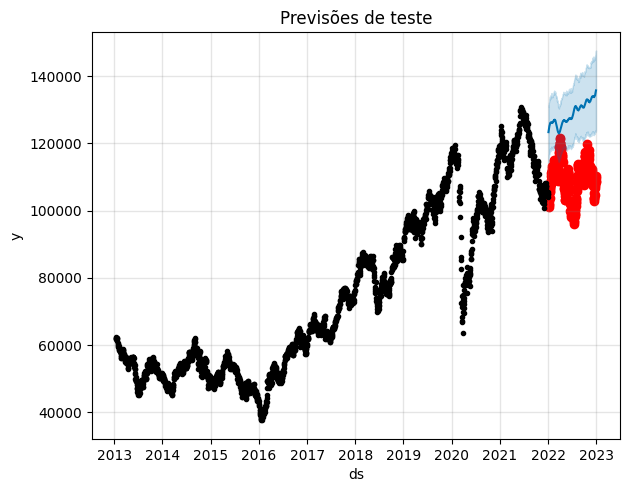

In [165]:
# configurando a área de plotagem
fig, ax = plt.subplots(1)
# adicionando os dados de teste
ax.scatter(test.ds, test['y'], color='r')
# plotando o gráfico
fig = m.plot(test_forecast, ax=ax)
# definindo o título
plt.title('Previsões de teste');

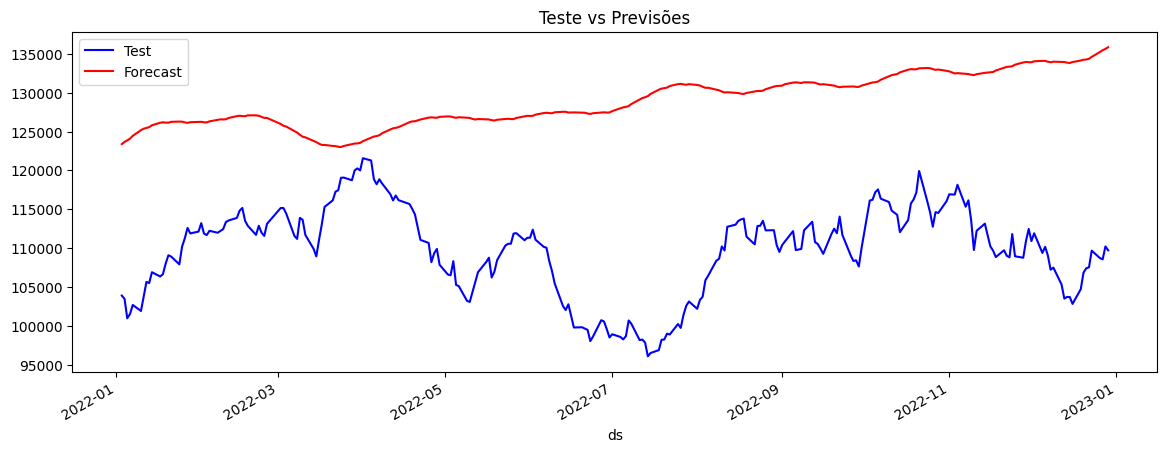

In [169]:
# configurando plotagem
f, ax = plt.subplots(figsize=(14,5))
# plotando o gráfico
test.plot(kind='line',x='ds', y='y', color='Blue', label='Test', ax=ax)
# plotando o gráfico
test_forecast.plot(kind='line',x='ds',y='yhat', color='Red',label='Forecast', ax=ax)
# definindo o título
plt.title('Teste vs Previsões');